# IMPORT LIBRARIES

In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error



In [45]:
# Load Data
df = pd.read_csv('indian_house_prices.csv')
df.head()


,Location,Area_sqft,BHK,Bathrooms,Parking,Furnishing,Price_Lakhs
0,Mumbai,702,3,3,0,Unfurnished,81.33
1,Mumbai,3371,5,2,2,Semi-Furnished,400.00
2,Mumbai,1495,2,2,2,Fully-Furnished,174.80
3,Hyderabad,3532,5,5,0,Semi-Furnished,215.76
4,Delhi,3708,2,2,2,Semi-Furnished,296.74


In [46]:
# Basic Info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     50 non-null     object 
 1   Area_sqft    50 non-null     int64  
 2   BHK          50 non-null     int64  
 3   Bathrooms    50 non-null     int64  
 4   Parking      50 non-null     int64  
 5   Furnishing   50 non-null     object 
 6   Price_Lakhs  50 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.9+ KB


,Area_sqft,BHK,Bathrooms,Parking,Price_Lakhs
count,50.000000,50.000000,50.00000,50.000000,50.000000
mean,2162.600000,3.060000,2.70000,0.980000,163.008200
std,959.274832,1.405674,1.24949,0.914509,86.637173
min,686.000000,1.000000,1.00000,0.000000,43.130000
25%,1467.750000,2.000000,2.00000,0.000000,98.677500
50%,2066.500000,3.000000,3.00000,1.000000,134.205000
75%,3022.500000,4.000000,3.00000,2.000000,220.372500
max,3904.000000,5.000000,5.00000,2.000000,403.710000


In [47]:
# Check Missing
df.isnull().sum()


Location       0
Area_sqft      0
BHK            0
Bathrooms      0
Parking        0
Furnishing     0
Price_Lakhs    0
dtype: int64

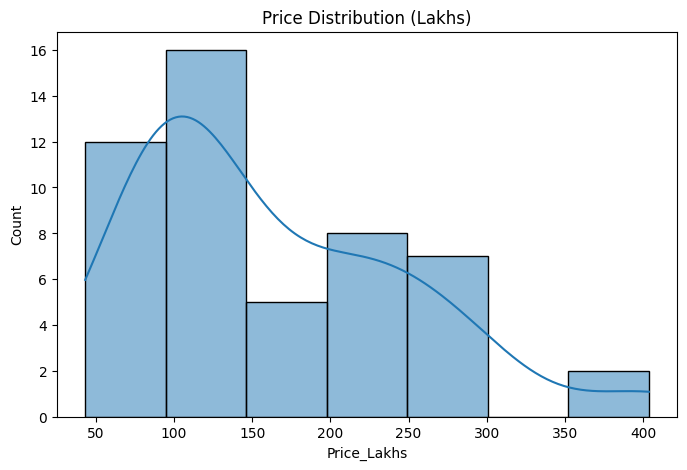

In [48]:
# Plot Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price_Lakhs'], kde=True)
plt.title('Price Distribution (Lakhs)')
plt.show()


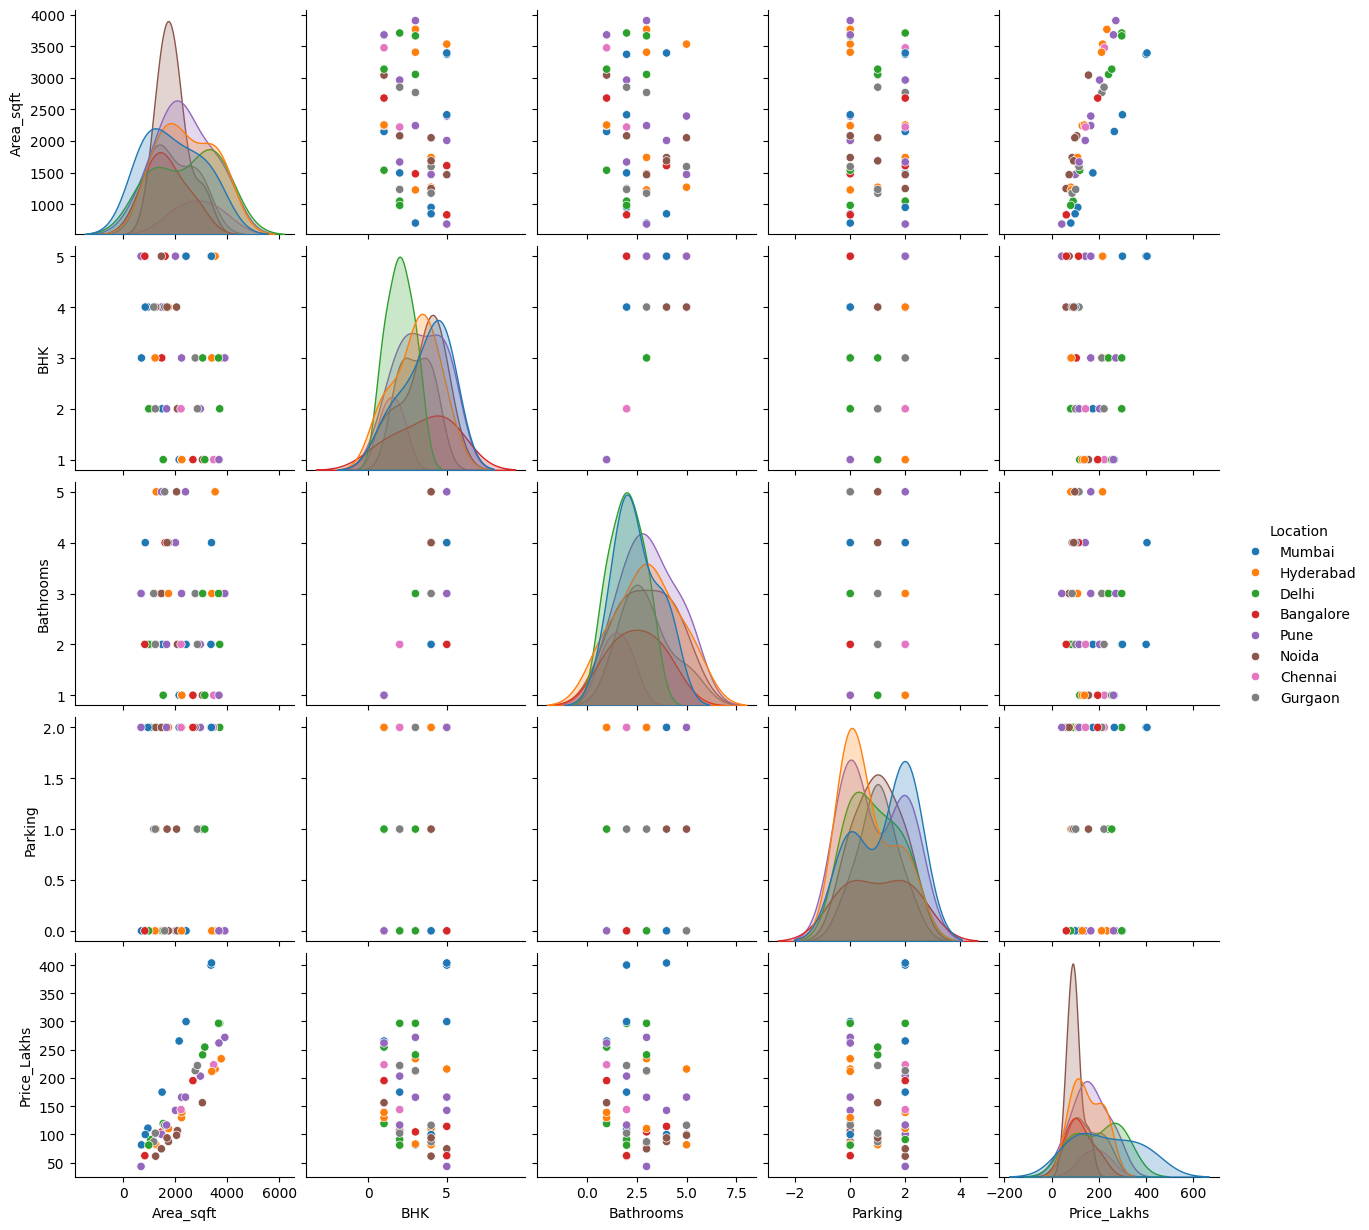

In [49]:
# EDA - Correlation
sns.pairplot(df, hue='Location')


In [50]:
# One-Hot Encoding for Categorical
df_encoded = pd.get_dummies(df, columns=['Location', 'Furnishing'], drop_first=True)
df_encoded.head()


,Area_sqft,BHK,Bathrooms,Parking,Price_Lakhs,Location_Chennai,Location_Delhi,Location_Gurgaon,Location_Hyderabad,Location_Mumbai,Location_Noida,Location_Pune,Furnishing_Semi-Furnished,Furnishing_Unfurnished
0,702,3,3,0,81.33,False,False,False,False,True,False,False,False,True
1,3371,5,2,2,400.00,False,False,False,False,True,False,False,True,False
2,1495,2,2,2,174.80,False,False,False,False,True,False,False,False,False
3,3532,5,5,0,215.76,False,False,False,True,False,False,False,True,False
4,3708,2,2,2,296.74,False,True,False,False,False,False,False,True,False


In [51]:
#Features & Target
X = df_encoded.drop('Price_Lakhs', axis=1)
y = df_encoded['Price_Lakhs']


In [52]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f'Linear Regression R²: {r2_lr:.2f}')
print(f'Linear Regression RMSE: {rmse_lr:.2f}')


Linear Regression R²: 0.95
Linear Regression RMSE: 12.38


In [54]:
#Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Random Forest R²: {r2_rf:.2f}')
print(f'Random Forest RMSE: {rmse_rf:.2f}')


Random Forest R²: 0.67
Random Forest RMSE: 33.22


# Plot Actual vs Predicted (Random Forest)


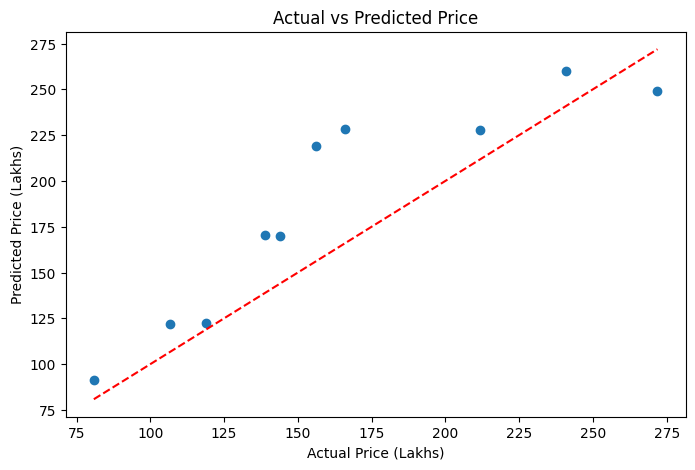

In [55]:

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('Actual vs Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# HOUSE PRICE PREDICTION INPUT

In [56]:
def predict_house(area, bhk, baths, parking, location, furnishing):
    row = pd.DataFrame([0]*len(X.columns)).T
    row.columns = X.columns

    row['Area_sqft'] = area
    row['BHK'] = bhk
    row['Bathrooms'] = baths
    row['Parking'] = parking

    loc_col = f'Location_{location}'
    if loc_col in row.columns:
        row[loc_col] = 1

    fur_col = f'Furnishing_{furnishing}'
    if fur_col in row.columns:
        row[fur_col] = 1

    price = rf.predict(row)[0]
    return round(price, 2)


In [57]:
# Example
price = predict_house(2000, 3, 2, 1, 'Noida', 'Fully-Furnished')
print(f"Predicted Price: {price} Lakhs")

# Example
price2 = predict_house(1500, 2, 2, 1, 'Bangalore', 'Semi-Furnished')
print(f"Predicted Price: {price2} Lakhs")


Predicted Price: 115.85 Lakhs
Predicted Price: 122.61 Lakhs
